# Long Short Term Memory (LSTM)

- enhanced version of vanilla RNN

- handles long term dependencies better

- consists of four gates: forget gate $\mathbf{f}_t$, input gate $\mathbf{i}_t$, candidate gate $\mathbf{\tilde{c}}_t$ and output gate $\mathbf{o}_t$

- gates produce cell states $\mathbf{c}_t$ (long term memory) and hidden states $\mathbf{h}_t$ (short term memory)

- $\sigma$ denotes the sigmoid function, $\phi$ denotes hyperbolic tangent function $\tanh$, $\odot$ denotes element-wise multiplication and $\cdot$ denotes dot product

![LSTM](../img/lstm.png)

source: https://d2l.ai/chapter_recurrent-modern/lstm.html

# Forward pass

$$ \mathbf{x}_t = [\mathbf{x}_t, \mathbf{h}_{t-1}] \quad \rightarrow \quad \text{Concatenation of input and previous hidden state}$$

$$

\mathbf{f}_t = \sigma(\mathbf{x_t} \cdot \mathbf{W}_f + \mathbf{b}_f)

\quad \quad 

\mathbf{i}_t = \sigma(\mathbf{x_t} \cdot \mathbf{W}_i + \mathbf{b}_i)

\quad \quad

\mathbf{\tilde{c}}_t = \phi(\mathbf{x_t} \cdot \mathbf{W}_c + \mathbf{b}_c)

\quad \quad

\mathbf{o}_t = \sigma(\mathbf{x_t} \cdot \mathbf{W}_o + \mathbf{b}_o)

$$

$$ \mathbf{c}_t = \mathbf{c}_{t-1} \odot \mathbf{f}_t + \mathbf{i}_t \odot \mathbf{\tilde{c}}_t$$

$$ \mathbf{h}_t = \phi(\mathbf{c}_t) \odot \mathbf{o}_t $$

# Gradients

$$ 
\begin{align*}

\begin{aligned}
\frac{\partial \mathbf{f}_t}{\partial \mathbf{W}_f} &= \sigma'(\mathbf{x_t} \cdot \mathbf{W}_f + \mathbf{b}_f) \cdot \mathbf{x}_t \\
&= \left[ \mathbf{f}_t \odot (1 - \mathbf{f}_t) \right] \cdot \mathbf{x}_t \\ \\

\frac{\partial \mathbf{f}_t}{\partial \mathbf{b}_f} &= \sigma'(\mathbf{x_t} \cdot \mathbf{W}_f + \mathbf{b}_f) \cdot 1\\
&= \mathbf{f}_t \odot (1 - \mathbf{f}_t) \\ \\

\frac{\partial \mathbf{f}_t}{\partial \mathbf{x}_t} &= \sigma'(\mathbf{x_t} \cdot \mathbf{W}_f + \mathbf{b}_f) \cdot \mathbf{W}_f \\
&= \left[ \mathbf{f}_t \odot (1 - \mathbf{f}_t) \right] \cdot \mathbf{W}_f
\end{aligned}

\quad \quad

\begin{aligned}
\frac{\partial \mathbf{i}_t}{\partial \mathbf{W}_i} &= \sigma'(\mathbf{x_t} \cdot \mathbf{W}_i + \mathbf{b}_i) \cdot \mathbf{x}_t \\
&= \left[ \mathbf{i}_t \odot (1 - \mathbf{i}_t) \right] \cdot \mathbf{x}_t \\ \\

\frac{\partial \mathbf{i}_t}{\partial \mathbf{b}_i} &= \sigma'(\mathbf{x_t} \cdot \mathbf{W}_i + \mathbf{b}_i) \cdot 1\\
&= \mathbf{i}_t \odot (1 - \mathbf{i}_t) \\ \\

\frac{\partial \mathbf{i}_t}{\partial \mathbf{x}_t} &= \sigma'(\mathbf{x_t} \cdot \mathbf{W}_i + \mathbf{b}_i) \cdot \mathbf{W}_i \\
&= \left[ \mathbf{i}_t \odot (1 - \mathbf{i}_t) \right] \cdot \mathbf{W}_i
\end{aligned}

\quad \quad

\begin{aligned}
\frac{\partial \mathbf{\tilde{c}}_t}{\partial \mathbf{W}_c} &= \phi'(\mathbf{x_t} \cdot \mathbf{W}_c + \mathbf{b}_c) \cdot \mathbf{x}_t \\
&= \left[ 1 - \tilde{c}_t^2 \right] \cdot \mathbf{x}_t \\ \\

\frac{\partial \mathbf{\tilde{c}}_t}{\partial \mathbf{b}_c} &= \phi'(\mathbf{x_t} \cdot \mathbf{W}_c + \mathbf{b}_c) \cdot 1\\
&= 1 - \tilde{c}_t^2 \\ \\

\frac{\partial \mathbf{\tilde{c}}_t}{\partial \mathbf{x}_t} &= \phi'(\mathbf{x_t} \cdot \mathbf{W}_c + \mathbf{b}_c) \cdot \mathbf{W}_c \\
&= \left[ 1 - \tilde{c}_t^2 \right] \cdot \mathbf{W}_c
\end{aligned}

\quad \quad

\begin{aligned}
\frac{\partial \mathbf{o}_t}{\partial \mathbf{W}_o} &= \sigma'(\mathbf{x_t} \cdot \mathbf{W}_o + \mathbf{b}_o) \cdot \mathbf{x}_t \\
&= \left[ \mathbf{o}_t \odot (1 - \mathbf{o}_t) \right] \cdot \mathbf{x}_t \\ \\

\frac{\partial \mathbf{o}_t}{\partial \mathbf{b}_o} &= \sigma'(\mathbf{x_t} \cdot \mathbf{W}_o + \mathbf{b}_o) \cdot 1\\
&= \mathbf{o}_t \odot (1 - \mathbf{o}_t) \\ \\

\frac{\partial \mathbf{o}_t}{\partial \mathbf{x}_t} &= \sigma'(\mathbf{x_t} \cdot \mathbf{W}_o + \mathbf{b}_o) \cdot \mathbf{W}_o \\
&= \left[ \mathbf{o}_t \odot (1 - \mathbf{o}_t) \right] \cdot \mathbf{W}_o
\end{aligned}

\end{align*}
$$

$$ 

\frac{\partial \mathbf{c}_t}{\partial \mathbf{c}_{t-1}} =  \mathbf{f}_t

\quad \quad

\frac{\partial \mathbf{c}_t}{\partial \mathbf{f}_t} =  \mathbf{c}_{t-1}

\quad \quad

\frac{\partial \mathbf{c}_t}{\partial \mathbf{i}_t} =  \mathbf{\tilde{c}}_t

\quad \quad

\frac{\partial \mathbf{c}_t}{\partial \mathbf{\tilde{c}}_t} =  \mathbf{i}_t
$$

$$

\begin{aligned}
\frac{\partial \mathbf{h}_t}{\partial \mathbf{c}_t} &= \phi'(\mathbf{c}_t) \odot \mathbf{o}_t \\
&= \left[ 1 - \phi^2(\mathbf{c}_t) \right] \odot \mathbf{o}_t

\end{aligned}

\quad \quad

\frac{\partial \mathbf{h}_t}{\partial \mathbf{o}_t} = \phi(\mathbf{c}_t)

$$

# Backward pass

$$

\begin{align*}

    \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_o} &= \frac{\partial \mathcal{L}_t}{\partial \mathbf{h}_t} \cdot \frac{\partial \mathbf{h}_t}{\partial \mathbf{o}_t} \cdot \frac{\partial \mathbf{o}_t}{\partial \mathbf{W}_o} \\

    &= \left[ \delta_t \odot \phi(\mathbf{c}_t) \odot \mathbf{o}_t \odot (1 - \mathbf{o}_t) \right] \cdot \mathbf{x}_t

\end{align*}

\quad \quad

\frac{\partial \mathcal{L}}{\partial \mathbf{W}_o} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_o} \\ \\

$$

$$
\begin{align*}

    \frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_o} &=\frac{\partial \mathcal{L}_t}{\partial \mathbf{h}_t} \cdot \frac{\partial \mathbf{h}_t}{\partial \mathbf{o}_t} \cdot \frac{\partial \mathbf{o}_t}{\partial \mathbf{b}_o} \\

    &= \delta_t \odot \phi(\mathbf{c}_t) \odot \mathbf{o}_t \odot (1 - \mathbf{o}_t)

\end{align*}

\quad \quad

\frac{\partial \mathcal{L}}{\partial \mathbf{b}_o} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_o}
$$

$$
\begin{align*}

\frac{\partial \mathcal{L}_t}{\partial \mathbf{c}_t} &= \frac{\partial \mathcal{L}_t}{\partial \mathbf{h}_t} \cdot \frac{\partial \mathbf{h}_t}{\partial \mathbf{c}_t} + \frac{\partial \mathcal{L}_{t+1}}{\partial \mathbf{h}_{t+1}} \cdot \frac{\partial \mathbf{h}_{t+1}}{\partial \mathbf{c}_{t+1}} \cdot \frac{\partial \mathbf{c}_{t+1}}{\partial \mathbf{c}_t} \\

&= \delta_t \odot \left[ 1 - \phi^2(\mathbf{c}_t) \right] \odot \mathbf{o}_t + \delta_{t+1} \odot \left[ 1 - \phi^2(\mathbf{c}_{t+1}) \right] \odot \mathbf{o}_{t+1} \odot \mathbf{f}_{t+1} \\

&= \mathbf{g}_t + \mathbf{g}_{t+1} \odot \mathbf{f}_{t+1}

\end{align*}
$$

$$

\begin{align*}

    \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_c} &= \frac{\partial \mathcal{L}_t}{\partial \mathbf{c}_t} \cdot \frac{\partial \mathbf{c}_t}{\partial \mathbf{\tilde{c}}_t} \cdot  \frac{\partial \mathbf{\tilde{c}_t}}{\partial \mathbf{W}_c}\\
    
    &= \left( \left( \mathbf{g}_t + \mathbf{g}_{t+1} \odot \mathbf{f}_{t+1} \right) \odot \mathbf{i}_{t} \odot \left[ 1 - \tilde{c}_t^2 \right] \right) \cdot \mathbf{x}_t
 
\end{align*}

\quad \quad

\frac{\partial \mathcal{L}}{\partial \mathbf{W}_c} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_c} \\ \\

$$

$$

\begin{align*}

    \frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_c} &= \frac{\partial \mathcal{L}_t}{\partial \mathbf{c}_t} \cdot \frac{\partial \mathbf{c}_t}{\partial \mathbf{\tilde{c}}_t} \cdot  \frac{\partial \mathbf{\tilde{c}_t}}{\partial \mathbf{b}_c}\\
    
    &=  \left( \mathbf{g}_t + \mathbf{g}_{t+1} \odot \mathbf{f}_{t+1} \right) \odot \mathbf{i}_{t} \odot \left[ 1 - \tilde{c}_t^2 \right]
 
\end{align*}

\quad \quad

\frac{\partial \mathcal{L}}{\partial \mathbf{b}_c} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_c} \\ \\

$$

$$

\begin{align*}

    \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_i} &= \frac{\partial \mathcal{L}_t}{\partial \mathbf{c}_t} \cdot \frac{\partial \mathbf{c}_t}{\partial \mathbf{i}_t} \cdot  \frac{\partial \mathbf{i}_t}{\partial \mathbf{W}_i}\\
    
    &= \left( \left( \mathbf{g}_t + \mathbf{g}_{t+1} \odot \mathbf{f}_{t+1} \right) \odot \mathbf{\tilde{c}}_{t} \odot \mathbf{i}_t \odot (1 - \mathbf{i}_t) \right) \cdot \mathbf{x}_t
 
\end{align*}

\quad \quad

\frac{\partial \mathcal{L}}{\partial \mathbf{W}_i} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_i} \\ \\

$$

$$

\begin{align*}

    \frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_i} &= \frac{\partial \mathcal{L}_t}{\partial \mathbf{c}_t} \cdot \frac{\partial \mathbf{c}_t}{\partial \mathbf{i}_t} \cdot  \frac{\partial \mathbf{i}_t}{\partial \mathbf{b}_i}\\
    
    &= \left( \mathbf{g}_t + \mathbf{g}_{t+1} \odot \mathbf{f}_{t+1} \right) \odot \mathbf{\tilde{c}}_{t} \odot \mathbf{i}_t \odot (1 - \mathbf{i}_t)
 
\end{align*}

\quad \quad

\frac{\partial \mathcal{L}}{\partial \mathbf{b}_i} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_i} \\ \\

$$

$$

\begin{align*}

    \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_f} &= \frac{\partial \mathcal{L}_t}{\partial \mathbf{c}_t} \cdot \frac{\partial \mathbf{c}_t}{\partial \mathbf{f}_t} \cdot  \frac{\partial \mathbf{f}_t}{\partial \mathbf{W}_f}\\
    
    &= \left( \left( \mathbf{g}_t + \mathbf{g}_{t+1} \odot \mathbf{f}_{t+1} \right) \odot \mathbf{c}_{t-1} \odot \mathbf{f}_t \odot (1 - \mathbf{f}_t) \right) \cdot \mathbf{x}_t
 
\end{align*}

\quad \quad

\frac{\partial \mathcal{L}}{\partial \mathbf{W}_f} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{W}_f} \\ \\

$$

$$

\begin{align*}

    \frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_f} &= \frac{\partial \mathcal{L}_t}{\partial \mathbf{c}_t} \cdot \frac{\partial \mathbf{c}_t}{\partial \mathbf{f}_t} \cdot  \frac{\partial \mathbf{f}_t}{\partial \mathbf{b}_f}\\
    
    &=  \left( \mathbf{g}_t + \mathbf{g}_{t+1} \odot \mathbf{f}_{t+1} \right) \odot \mathbf{c}_{t-1} \odot \mathbf{f}_t \odot (1 - \mathbf{f}_t)
 
\end{align*}

\quad \quad

\frac{\partial \mathcal{L}}{\partial \mathbf{b}_f} = \sum_t \frac{\partial \mathcal{L}_t}{\partial \mathbf{b}_f} \\ \\

$$

$$
\begin{align*}
\frac{\partial \mathbf{c}_t}{\partial \mathbf{x}_t} &= \frac{\partial \mathbf{c}_t}{\partial \mathbf{f}_t} \cdot \frac{\partial \mathbf{f}_t}{\partial \mathbf{x}_t} + \frac{\partial \mathbf{c}_t}{\partial \mathbf{i}_t} \cdot \frac{\partial \mathbf{i}_t}{\partial \mathbf{x}_t} + \frac{\partial \mathbf{c}_t}{\partial \mathbf{\tilde{c}_t}} \cdot \frac{\partial \mathbf{\tilde{c}_t}}{\partial \mathbf{x}_t} \\

&= \mathbf{c}_{t-1} \cdot \mathbf{W}_f + \mathbf{\tilde{c}_t} \cdot \mathbf{W}_i + \mathbf{i}_t \cdot \mathbf{W}_c


\end{align*}
$$

$$

\begin{align*}

    \frac{\partial \mathcal{L}_t}{\partial \mathbf{x}_t} &= \frac{\partial \mathcal{L}_t}{\partial \mathbf{c}_t} \cdot \frac{\partial \mathbf{c}_t}{\partial \mathbf{x}_t} + \frac{\partial \mathcal{L}_t}{\partial \mathbf{h}_t} \cdot \frac{\partial \mathbf{h}_t}{\partial \mathbf{o}_t} \cdot \frac{\partial \mathbf{o}_t}{\partial \mathbf{x}_t}\\

    &= \left( \mathbf{g}_t + \mathbf{g}_{t+1} \odot \mathbf{f}_{t+1} \right) \cdot \left( \mathbf{c}_{t-1} \cdot \mathbf{W}_f + \mathbf{\tilde{c}_t} \cdot \mathbf{W}_i + \mathbf{i}_t \cdot \mathbf{W}_c \right) + \left( \delta_t \odot \phi(\mathbf{c}_t) \odot  \mathbf{o}_t \odot (1 - \mathbf{o}_t) \right) \cdot \mathbf{W}_o 
 
\end{align*}

$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# LSTM implementation

In [2]:
from dlfs.base import Layer

class LSTMLayer(Layer):

    def __init__(self, n_inputs: int, n_hidden: int, predict_sequence: bool = False) -> None:
        """
        Long short term memory layer. Takes 3D arrays of shape (n_samples, n_timestamps, n_features) as input.

        Parameters
        ----------
        n_inputs : int
            Number of input features.

        n_hidden : int
            Number of hidden features.

        predict_sequence : bool, default=False
            Whether a sequence or a single element is returned as output.

        Attributes
        ----------
        input_weights : numpy.ndarray
            Matrix of input weight coefficients.

        input_bias : numpy.ndarray
            Vector of input bias coefficients.

        forget_weights : numpy.ndarray
            Matrix of forget weight coefficients.

        forget_bias : numpy.ndarray
            Vector of forget bias coefficients.

        candidate_weights : numpy.ndarray
            Matrix of candidate weight coefficients.

        candidate_bias : numpy.ndarray
            Vector of candidate bias coefficients.

        output_weights : numpy.ndarray
            Matrix of output weight coefficients.

        output_bias : numpy.ndarray
            Vector of output bias coefficients.
        """
        self.predict_sequence = predict_sequence

        # Initialize parameters
        k = 1 / np.sqrt(n_hidden)
        self.n_hidden = n_hidden
        self.n_inputs = n_inputs

        self.input_weights = np.random.uniform(-k, k, (n_inputs + n_hidden, n_hidden))
        self.input_bias = np.random.uniform(-k, k, (n_hidden))

        self.forget_weights = np.random.uniform(-k, k, (n_inputs + n_hidden, n_hidden))
        self.forget_bias = np.random.uniform(-k, k, (n_hidden))

        self.candidate_weights = np.random.uniform(-k, k, (n_inputs + n_hidden, n_hidden))
        self.candidate_bias = np.random.uniform(-k, k, (n_hidden)) 

        self.output_weights = np.random.uniform(-k, k, (n_inputs + n_hidden, n_hidden))
        self.output_bias = np.random.uniform(-k, k, (n_hidden)) 
             
    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using the LSTM layer. 
        Creates hidden, candidate, cell, forget, input, output states and output attributes.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """

        # Store number of samples and timestamps
        self.n_samples, self.timestamps = inputs.shape[:2]

        # Initialize concatenated inputs matrix
        self.concat_inputs = np.zeros((self.n_samples, self.timestamps, self.n_hidden + self.n_inputs))

        # Store input shape
        self.input_shape = inputs.shape

        # Initialize states
        self.hidden_states = np.zeros((self.n_samples, self.timestamps, self.n_hidden))
        self.candidate_states = np.zeros((self.n_samples, self.timestamps, self.n_hidden))
        self.cell_states = np.zeros((self.n_samples, self.timestamps, self.n_hidden))
        self.forget_states = np.zeros((self.n_samples, self.timestamps, self.n_hidden))
        self.input_states = np.zeros((self.n_samples, self.timestamps, self.n_hidden))
        self.output_states = np.zeros((self.n_samples, self.timestamps, self.n_hidden))

        # Loop through timestamps
        for t in range(self.timestamps):

            # Concatenate inputs and previous hidden states
            inputs_hidden_concatenated = np.concatenate((inputs[:, t, :], self.hidden_states[:, max(0, t-1), :]), axis=1)
            self.concat_inputs[:, t, :] = inputs_hidden_concatenated

            # Calculate current forget state
            f_t = np.dot(inputs_hidden_concatenated, self.forget_weights) + self.forget_bias
            f_t = self._sigmoid(f_t)
            self.forget_states[:, t, :] = f_t

            # Calculate current input state
            i_t = np.dot(inputs_hidden_concatenated, self.input_weights) + self.input_bias
            i_t = self._sigmoid(i_t)
            self.input_states[:, t, :] = i_t

            # Calculate current candidate state
            cc_t = np.dot(inputs_hidden_concatenated, self.candidate_weights) + self.candidate_bias
            cc_t = np.tanh(cc_t)
            self.candidate_states[:, t, :] = cc_t

            # Calculate current output state
            o_t = np.dot(inputs_hidden_concatenated, self.output_weights) + self.output_bias
            o_t = self._sigmoid(o_t)
            self.output_states[:, t, :] = o_t

            # Calculate current cell state
            c_t = self.cell_states[:, max(0, t-1), :] * f_t + i_t * cc_t
            self.cell_states[:, t, :] = c_t

            # Calculate current hidden state
            self.hidden_states[:, t, :] = o_t * np.tanh(c_t)
       
        if self.predict_sequence:
            # Hidden states of the current sequence are the predicted sequence
            self.output = self.hidden_states
        else:
            # Last hidden state of the current sequence is the predicted element
            self.output = self.hidden_states[:, -1, :]

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using the LSTM layer. 
        Creates gradient attributes with respect to input, forget, candidate, output weights and biases, and inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        # Initialize gradient attributes
        self.dforget_weights = np.zeros_like(self.forget_weights)
        self.dforget_bias = np.zeros_like(self.forget_bias)

        self.dinput_weights = np.zeros_like(self.input_weights)
        self.dinput_bias = np.zeros_like(self.input_bias)

        self.dcandidate_weights = np.zeros_like(self.candidate_weights)
        self.dcandidate_bias = np.zeros_like(self.candidate_bias)

        self.doutput_weights = np.zeros_like(self.output_weights)
        self.doutput_bias = np.zeros_like(self.output_bias)

        self.dinputs = np.zeros(self.input_shape, dtype=np.float64)

        # Initialize next cell state gradient
        next_cell_state_grad = None

        # Loop through timestamps in reversed order
        for t in range(self.timestamps - 1, -1, -1):

            # Get current states
            c_t = self.cell_states[:, t, :]
            cc_t = self.candidate_states[:, t, :]
            o_t = self.output_states[:, t, :]
            f_t = self.forget_states[:, t, :]
            i_t = self.input_states[:, t, :]
            x_t = self.concat_inputs[:, t, :]

            if len(delta.shape) == 2:
                delta_t = delta
            elif len(delta.shape) == 3:
                delta_t = delta[:, t, :]

            output_grad = delta_t * np.tanh(c_t) * (1 - o_t) * o_t
            self.doutput_weights += np.dot(x_t.T, output_grad)
            self.doutput_bias += output_grad.sum(axis=0)

            cell_state_grad = delta_t * o_t * (1 - np.tanh(c_t)**2)
            if next_cell_state_grad is not None:
                cell_state_grad += next_cell_state_grad * self.forget_states[:, t+1, :]

            next_cell_state_grad = cell_state_grad

            candidate_grad = cell_state_grad *  i_t * (1 - cc_t**2)

            self.dcandidate_weights += np.dot(x_t.T, candidate_grad)
            self.dcandidate_bias += candidate_grad.sum(axis=0)

            input_grad = cell_state_grad * cc_t * (1 - i_t) * i_t
            self.dinput_weights += np.dot(x_t.T, input_grad)
            self.dinput_bias += input_grad.sum(axis=0)

            if t > 0:
                forget_grad = cell_state_grad * self.candidate_states[:, t-1, :] * ((1 - f_t) * f_t)
                self.forget_weights += np.dot(x_t.T, forget_grad)
                self.forget_bias += forget_grad.sum(axis=0)

            self.dinputs[:, t, :] = np.dot(output_grad, self.output_weights[:self.n_inputs, :].T)  + \
                                    np.dot(input_grad, self.input_weights[:self.n_inputs, :].T) + \
                                    np.dot(forget_grad, self.forget_weights[:self.n_inputs, :].T) + \
                                    np.dot(candidate_grad, self.candidate_weights[:self.n_inputs, :].T)
   
    def _sigmoid(self, x: np.ndarray) -> np.ndarray:
        """
        Sigmoid activation function.

        Parameters
        ----------
        x : np.ndarray
            Input array.

        Returns
        -------
        sigmoid_output : np.ndarray
        """
        x = np.clip(x, -50, 50)
        return 1 / (1 + np.exp(-x))
    
class LSTM:

    def __init__(self, n_inputs: int, n_hidden: int, n_layers: int = 1, predict_sequence: bool = False) -> None:
        """
        LSTM neural network. Takes 3D arrays of shape (n_samples, n_timestamps, n_features) as input.

        Parameters
        ----------
        n_inputs : int
            Number of input features.

        n_hidden : int
            Number of hidden features.

        n_layers : int, default=1
            Number of LSTM layers.

        predict_sequence : bool, default=False
            Whether a sequence or a single element is returned as output.

        Attributes
        ----------
        lstm_layers : list[LSTMLayer]
            List containing LSTM layers.
        """
        if n_layers == 1:
            self.lstm_layers = [LSTMLayer(n_inputs, n_hidden, predict_sequence)]
        else:
            self.lstm_layers = [LSTMLayer(n_inputs, n_hidden)]
            if predict_sequence:
                for i in range(n_layers - 1):
                    if i == n_layers - 2:
                        self.lstm_layers.append(LSTMLayer(n_hidden, n_hidden, predict_sequence=True))
                    else:
                        self.lstm_layers.append(LSTMLayer(n_hidden, n_hidden))
            else:
                for i in range(n_layers - 1):
                    self.lstm_layers.append(LSTMLayer(n_hidden, n_hidden))

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using the LSTM. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Pass data to the first LSTM layer
        self.lstm_layers[0].forward(inputs)

        # Forward hidden states of the previous LSTM layer to the current one
        for idx, layer in enumerate(self.lstm_layers[1:], start=1):
            layer.forward(self.lstm_layers[idx - 1].hidden_states)

        # Output of the LSTM is the final LSTM layer's output
        self.output = self.lstm_layers[-1].output.copy()

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using the LSTM.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        # Pass gradient to the final LSTM layer
        self.lstm_layers[-1].backward(delta)

        # Backpropagate gradient
        for idx, layer in reversed(list(enumerate(self.lstm_layers[:-1]))):
            layer.backward(self.lstm_layers[idx + 1].dinputs)

In [19]:
def convert_data_to_sequence(X, y, sequence_length, predict_sequence=False):
    X_new = []
    y_new = []

    if predict_sequence:
        for i in range(len(X) - sequence_length):
            X_new.append(X[i:i+sequence_length, :])
            y_new.append(y[i:i+sequence_length])
    else:
        for i in range(len(X) - sequence_length):
            X_new.append(X[i:i+sequence_length, :])
            y_new.append(y[i+sequence_length])

    X_new, y_new = np.array(X_new), np.array(y_new)

    return X_new, y_new

# Sine dataset

In [20]:
def create_sine_data(start, stop, n_samples):
    X = np.linspace(start, stop, n_samples)
    y = np.sin(X)
    return X, y

X, y = create_sine_data(-20, 20, 500)

# Train test split

In [21]:
threshold = 0.8

X_train = X[:int(threshold*len(X))].copy().reshape(-1, 1)
y_train = y[:int(threshold*len(X))].copy().reshape(-1, 1)

X_test = X[int(threshold*len(X)):].copy().reshape(-1, 1)
y_test = y[int(threshold*len(X)):].copy().reshape(-1, 1)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (400, 1), y_train: (400, 1)
X_test: (100, 1), y_test: (100, 1)


# Creating sequences

In [22]:
sequence_len = 5

X_train_seq, y_train_seq = convert_data_to_sequence(X_train, y_train, sequence_len)
X_test_seq, y_test_seq = convert_data_to_sequence(X_test, y_test, sequence_len)

print(f'X_train: {X_train_seq.shape}, y_train: {y_train_seq.shape}')
print(f'X_test: {X_test_seq.shape}, y_test: {y_test_seq.shape}')

X_train: (395, 5, 1), y_train: (395, 1)
X_test: (95, 5, 1), y_test: (95, 1)


# Many to one LSTM

In [23]:
from dlfs import Model
from dlfs.loss import MSE_Loss
from dlfs.optimizers import Optimizer_Adam
from dlfs.layers import LSTM, DenseLayer

np.random.seed(0)

layers = [LSTM(1, 256, n_layers=2),
          DenseLayer(256, 1)
          ]
lr = 1e-2

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_Adam(learning_rate=lr))
model.train(X_train_seq, y_train_seq, epochs=500, batch_size=None, print_every=50)

===== EPOCH : 0 ===== LOSS : 6.84339 =====
===== EPOCH : 50 ===== LOSS : 0.21972 =====
===== EPOCH : 100 ===== LOSS : 0.13588 =====
===== EPOCH : 150 ===== LOSS : 0.10828 =====
===== EPOCH : 200 ===== LOSS : 0.09139 =====
===== EPOCH : 250 ===== LOSS : 0.04493 =====
===== EPOCH : 300 ===== LOSS : 0.02202 =====
===== EPOCH : 350 ===== LOSS : 0.02244 =====
===== EPOCH : 400 ===== LOSS : 0.00597 =====
===== EPOCH : 450 ===== LOSS : 0.01037 =====
===== EPOCH : 500 ===== LOSS : 0.00564 =====


Sequence loss: 0.49629413990019944


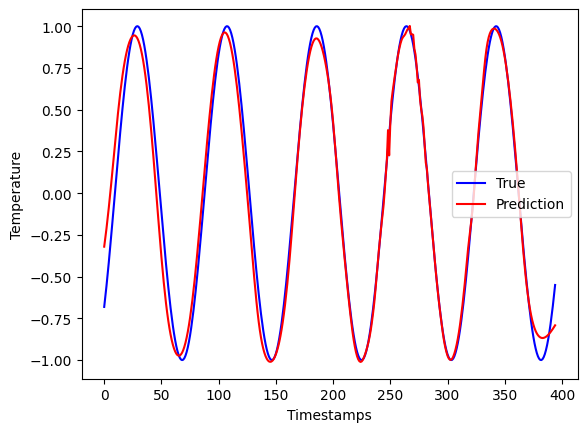

In [26]:
x = [x for x in range(len(X_train_seq))]

y_true = y_train_seq

x_pred = X_train_seq
y_pred = model.predict(x_pred)

print(f'Sequence loss: {model.loss_function.calculate(y_pred.reshape(-1), y_true)}')

plt.plot(x, y_true, color='blue', label="True")
plt.plot(x, y_pred, color="red", label="Prediction")
plt.xlabel('Timestamps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Weather dataset

In [43]:
import pandas as pd

data = pd.read_csv('clean_weather.csv', names=['date', 'tmax', 'tmin', 'rain', 'tmax_tomorrow'], header=0)
data.head(10)

,date,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.00,52.0
1,1970-01-02,52.0,39.0,0.00,52.0
2,1970-01-03,52.0,35.0,0.00,53.0
3,1970-01-04,53.0,36.0,0.00,52.0
4,1970-01-05,52.0,35.0,0.00,50.0
5,1970-01-06,50.0,38.0,0.00,52.0
6,1970-01-07,52.0,43.0,0.00,56.0
7,1970-01-08,56.0,49.0,0.24,54.0
8,1970-01-09,54.0,50.0,0.40,57.0
9,1970-01-10,57.0,50.0,0.00,57.0


In [44]:
FEATURES = ['tmax', 'tmin', 'rain']
TARGET = 'tmax_tomorrow'

X = data[FEATURES].to_numpy()
y = data[TARGET].to_numpy()

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (13509, 3)
y: (13509,)


# Train test split and scaling

In [45]:
from sklearn.preprocessing import StandardScaler

threshold = 0.3

X_train = X[:int(threshold*len(X)),:].copy()
y_train = y[:int(threshold*len(X))].copy()

X_test = X[int(threshold*len(X)):,:].copy()
y_test = y[int(threshold*len(X)):].copy()

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (4052, 3), y_train: (4052, 1)
X_test: (9457, 3), y_test: (9457, 1)


# Creating sequences of length 5 with one output

In [46]:
seq_len = 5
predict = False

X_train_one, y_train_one = convert_data_to_sequence(X_train, y_train.reshape(-1, 1), seq_len, predict_sequence=predict)
X_test_one, y_test_one = convert_data_to_sequence(X_test, y_test.reshape(-1, 1), seq_len, predict_sequence=predict)

print(f'X_train_one: {X_train_one.shape}, y_train_one: {y_train_one.shape}')
print(f'X_test_one: {X_test_one.shape}, y_test_one: {y_test_one.shape}')

X_train_one: (4047, 5, 3), y_train_one: (4047, 1)
X_test_one: (9452, 5, 3), y_test_one: (9452, 1)


# Many to one LSTM

In [47]:
np.random.seed(0)

layers = [LSTM(3, 64, n_layers=2),
          DenseLayer(64, 1)
          ]
lr = 1e-2

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_Adam(learning_rate=lr))
model.train(X_train_one, y_train_one, epochs=100, batch_size=64, print_every=10)

===== EPOCH : 0 ===== LOSS : 0.26097 =====
===== EPOCH : 10 ===== LOSS : 0.22501 =====
===== EPOCH : 20 ===== LOSS : 0.21238 =====
===== EPOCH : 30 ===== LOSS : 0.20278 =====
===== EPOCH : 40 ===== LOSS : 0.18874 =====
===== EPOCH : 50 ===== LOSS : 0.17642 =====
===== EPOCH : 60 ===== LOSS : 0.16112 =====
===== EPOCH : 70 ===== LOSS : 0.14750 =====
===== EPOCH : 80 ===== LOSS : 0.13542 =====
===== EPOCH : 90 ===== LOSS : 0.12355 =====
===== EPOCH : 100 ===== LOSS : 0.11594 =====


Sequence loss: 60.141810927227965


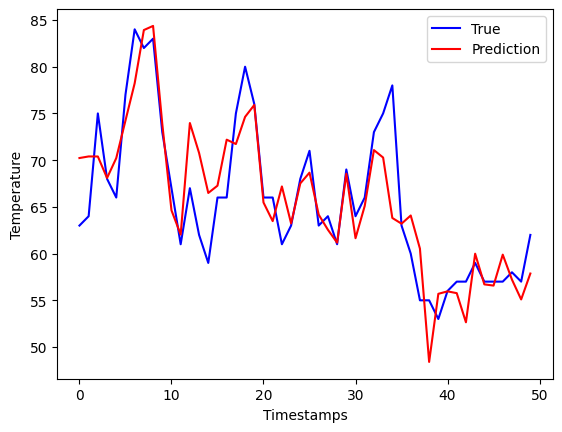

In [57]:
from random import randint

n_samples = 50
x = np.array([x for x in range(n_samples)])

rand_idx = randint(0, len(X_train_one) - n_samples)
y_true = y_train_one[rand_idx:rand_idx+n_samples]
y_true = scaler_y.inverse_transform(y_true)

x_pred = X_train_one[rand_idx:rand_idx+n_samples]
y_pred = model.predict(x_pred)
y_pred = scaler_y.inverse_transform(y_pred)
print(f'Sequence loss: {model.loss_function.calculate(y_pred.reshape(-1), y_true)}')

plt.plot(x, y_true, color='blue', label="True")
plt.plot(x, y_pred, color="red", label="Prediction")
plt.xlabel('Timestamps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Creating sequences of length 5 with 5 outputs

In [60]:
seq_len = 5
predict = True

X_train_many, y_train_many = convert_data_to_sequence(X_train, y_train.reshape(-1, 1), seq_len, predict_sequence=predict)
X_test_many, y_test_many = convert_data_to_sequence(X_test, y_test.reshape(-1, 1), seq_len, predict_sequence=predict)

print(f'X_train_many: {X_train_many.shape}, y_train_many: {y_train_many.shape}')
print(f'X_test_many: {X_test_many.shape}, y_test_many: {y_test_many.shape}')

X_train_many: (4047, 5, 3), y_train_many: (4047, 5, 1)
X_test_many: (9452, 5, 3), y_test_many: (9452, 5, 1)


# Many to many LSTM

In [61]:
np.random.seed(0)

layers = [LSTM(3, 64, predict_sequence=True),
          DenseLayer(64, 1)]
lr = 1e-2

model = Model(layers=layers, loss_function=MSE_Loss(), optimizer=Optimizer_Adam(learning_rate=lr))
model.train(X_train_one, y_train_one, epochs=100, batch_size=32, print_every=10)

===== EPOCH : 0 ===== LOSS : 0.20124 =====
===== EPOCH : 10 ===== LOSS : 0.18316 =====
===== EPOCH : 20 ===== LOSS : 0.21264 =====
===== EPOCH : 30 ===== LOSS : 0.20538 =====
===== EPOCH : 40 ===== LOSS : 0.20372 =====
===== EPOCH : 50 ===== LOSS : 0.19241 =====
===== EPOCH : 60 ===== LOSS : 0.22171 =====
===== EPOCH : 70 ===== LOSS : 0.23579 =====
===== EPOCH : 80 ===== LOSS : 0.17551 =====
===== EPOCH : 90 ===== LOSS : 0.19640 =====
===== EPOCH : 100 ===== LOSS : 0.20093 =====


Sequence loss: 23.883076330272825


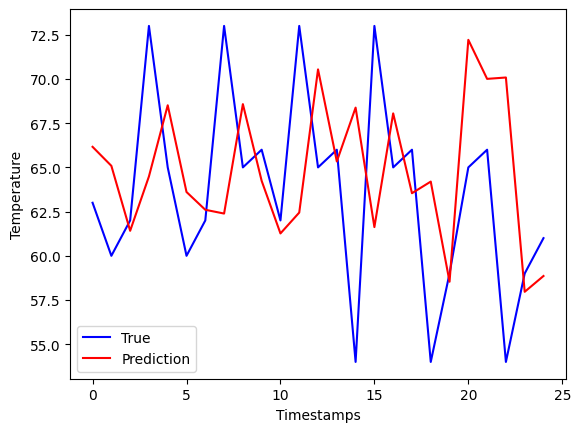

In [105]:
n_samples = 5
x = np.array([x for x in range(n_samples * 5)])

rand_idx = randint(0, len(X_train_many))
y_true = y_train_many[rand_idx:rand_idx+n_samples]
y_true = scaler_y.inverse_transform(y_true.reshape(-1, 1))

x_pred = X_train_many[rand_idx:rand_idx+n_samples]
y_pred = model.predict(x_pred).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred)
print(f'Sequence loss: {model.loss_function.calculate(y_pred.reshape(-1), y_true.reshape(-1))}')

plt.plot(x, y_true, color='blue', label="True")
plt.plot(x, y_pred, color="red", label="Prediction")
plt.xlabel('Timestamps')
plt.ylabel('Temperature')
plt.legend()
plt.show()